# 大陆深证股票3000点缠绕策略

## 原理 
1. 大陆目前因经济下行，长线看跌，有看跌方向做长期保障。
2. 大陆为宏观调控下的 市场经济，因此政策线将滞跌，使股票围绕政策先波动
3. 2与1就形成了 主观与客观的背离
4. 可围绕政策线做波动，但长期看跌

## 交易对象
股票

## 交易周期
M

## 交易指标
PPI CPI 人口老龄化率 通胀指数 股票涨跌率 政策线

## 风险控制

## 交易策略


In [1]:
import akshare as ak
# 中国 CPI 月率报告
macro_china_cpi_monthly_df = ak.macro_china_cpi_monthly()
print(macro_china_cpi_monthly_df)
print(macro_china_cpi_monthly_df.name)

1996-02-01    2.1
1996-03-01    2.3
1996-04-01    0.6
1996-05-01    0.7
1996-06-01   -0.5
             ... 
2023-07-10   -0.2
2023-08-09    0.2
2023-09-09    0.3
2023-10-13    0.2
2023-11-09   -0.1
Name: cpi, Length: 322, dtype: float64
cpi


In [2]:
#物流景气指数
import akshare as ak
macro_china_lpi_index_df = ak.macro_china_lpi_index()
print(macro_china_lpi_index_df)

             日期   最新值       涨跌幅    近3月涨跌幅     近6月涨跌幅     近1年涨跌幅    近2年涨跌幅  \
0    2013-07-01  52.4       NaN       NaN        NaN        NaN       NaN   
1    2013-08-01  52.9  0.954198       NaN        NaN        NaN       NaN   
2    2013-09-01  53.3  0.756144       NaN        NaN        NaN       NaN   
3    2013-10-01  53.6  0.562852  2.290076        NaN        NaN       NaN   
4    2013-11-01  53.0 -1.119403  0.189036        NaN        NaN       NaN   
..          ...   ...       ...       ...        ...        ...       ...   
120  2023-07-01  50.9 -1.547389 -5.390335  13.870246   4.732510  1.192843   
121  2023-08-01  50.3 -1.178782 -2.330097   0.399202   8.639309  1.616162   
122  2023-09-01  53.5  6.361829  3.481625  -3.603604   5.731225  4.901961   
123  2023-10-01  52.9 -1.121495  3.929273  -1.672862   8.401639 -1.121495   
124  2023-11-01  53.3  0.756144  5.964215   3.495146  14.870690 -0.559701   

       近3年涨跌幅  
0         NaN  
1         NaN  
2         NaN  
3         N

In [3]:
#上证指数
stock_zh_index_daily_df = ak.stock_zh_index_daily(symbol="sh000001")
print(stock_zh_index_daily_df)

            date      open      high       low     close       volume
0     1990-12-19    96.050    99.980    95.790    99.980       126000
1     1990-12-20   104.300   104.390    99.980   104.390        19700
2     1990-12-21   109.070   109.130   103.730   109.130         2800
3     1990-12-24   113.570   114.550   109.130   114.550         3200
4     1990-12-25   120.090   120.250   114.550   120.250         1500
...          ...       ...       ...       ...       ...          ...
8060  2023-12-18  2936.575  2951.148  2924.325  2930.804  29308699900
8061  2023-12-19  2928.763  2940.501  2914.125  2932.391  26592698000
8062  2023-12-20  2932.119  2937.101  2902.040  2902.110  26556245400
8063  2023-12-21  2892.020  2924.256  2882.020  2918.715  28254182700
8064  2023-12-22  2919.288  2935.700  2906.509  2914.775  29662836700

[8065 rows x 6 columns]


In [4]:
sh000001_close = stock_zh_index_daily_df['close']
print(sh000001_close)

0         99.980
1        104.390
2        109.130
3        114.550
4        120.250
          ...   
8060    2930.804
8061    2932.391
8062    2902.110
8063    2918.715
8064    2914.775
Name: close, Length: 8065, dtype: float64


/home/xiyanxiyan10/env/quant/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc


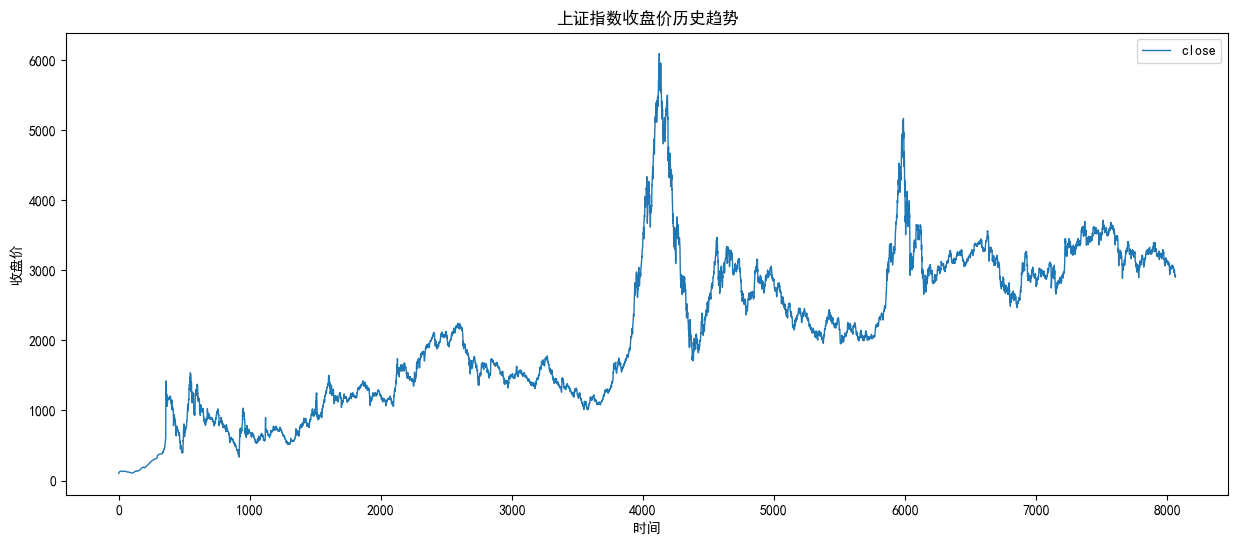

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import mpl
import matplotlib 
print(matplotlib.matplotlib_fname())

mpl.rcParams['font.sans-serif']=['simhei']# 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['figure.figsize'] = (15.0, 6.0)

sh000001_close.plot(linewidth=1)
plt.title("上证指数收盘价历史趋势")
plt.xlabel('时间')
plt.ylabel('收盘价')
plt.legend()
plt.show()